## Effects of Rocks on Regolith Temperatures

Regolith temperatures at night on the Moon may be influenced by rocks through both conduction and radiation. Heat conduction from the rock to the regolith is represented by

$$Q_\textrm{cond} = k \frac{T_\textrm{rock}-T_\textrm{reg}}{x}$$

where $k$ is the conductivity of the regolith, and $x$ is the distance from the rock. This conducted heat flux can be compared to the radiant heat flux of the regolith

$$Q_\textrm{rad} = \epsilon\sigma T_\textrm{reg}^4$$

To a first approximation, we model rock and regolith temperatures separately, as in *Bandfield et al.* (2011) and *Vasavada et al.* (2012). For comparison to numerical results from COMSOL (see below), we use $T_\textrm{rock} \approx$ 225 K, $T_\textrm{reg} \approx$ 109 K, representing typical nighttime temperatures.

In [1]:
# Import Python libraries
import numpy as np
import matplotlib
matplotlib.use('pdf')
import matplotlib.pyplot as plt
import planetRad as pr
%matplotlib inline

In [2]:
#############
# Constants #
#############
k = 2.5e-3                # thermal conductivity of regolith
emissivity = 0.90         # emissivity of regolith
T_reg = 109.0             # regolith temperature [K]
T_rock = 225.0            # rock temperature [K]
R = 1.0                   # Rock radius
C = 0.4e-2                # Rock abundance
x = np.logspace(np.log10(R)-4,np.log10(R),100) # array of distances from rock [m]

In [3]:
##############
# Conduction #
##############
Q_cond = k*(T_rock-T_reg)/x    # conducted heat flux from rock [W.m-2]
Q_rad = pr.sigma*T_reg**4      # radiant heat flux from regolith [W.m-2]
f = Q_cond/Q_rad-1             # equal fluxes at f=0
xmax = x[np.argmin(np.abs(f))] # distance of equal fluxes [m]

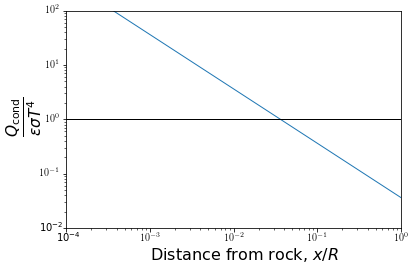

In [4]:
# Plot ratio of conductive to radiative heat fluxes
# When the ratio Q_cond/Q_rad ~ 1, conduction is no longer dominant
plt.loglog(x/R,Q_cond/Q_rad, x/R,x*0+1,'-k',linewidth=1)
font = {'family' : 'serif',
        'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)
plt.xlabel('Distance from rock, $x/R$',fontsize=16)
plt.ylabel(r'$\frac{Q_\mathrm{cond}}{\epsilon\sigma T^4}$',fontsize=22)
plt.axis([np.min(x),np.max(x),1e-2,1e2])
plt.show()

This shows that the conducted flux from the rock is important in the surface energy budget at distances $x \lesssim 4$ cm, where it is comparable to the radiant flux, i.e., $Q_\textrm{cond} = Q_\textrm{rad}$. At smaller distances, the temperature is increased by an amount $\Delta T$ given by

$$k\frac{T_\textrm{rock}-(T_\textrm{reg}+\Delta T)}{x} \approx \epsilon \sigma (T_\textrm{reg}+\Delta T)^4$$

Since $\delta T \ll T_\textrm{reg}$, we can neglect terms in $\Delta T^2$ and higher order, and approximate

$$(T_\textrm{reg}+\Delta T)^4 \approx T_\textrm{reg}^4 + 4T_\textrm{reg}^3\Delta T + \ldots $$

Then solve

$$ (k/x)T_\textrm{rock} - (k/x)T_\textrm{reg} - \epsilon \sigma T_\textrm{reg}^4 = (4\epsilon \sigma T_\textrm{reg}^3 + k/x)\Delta T $$

$$ Q_\textrm{cond} - Q_\textrm{rad} \approx (4\epsilon \sigma T_\textrm{reg}^3 + k/x)\Delta T $$

such that

$$ \Delta T \approx \frac{Q_\textrm{cond}-Q_\textrm{rad}}{4\epsilon \sigma T_\textrm{reg}^3 + k/x} $$

In [5]:
deltaT = (Q_cond - Q_rad)/(4*emissivity*pr.sigma*T_reg**3 + k/x)

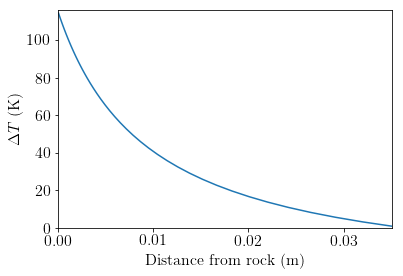

In [6]:
plt.figure
matplotlib.rc('font', **font)
plt.plot(x, deltaT)
plt.ylim([0,T_rock-T_reg])
plt.xlim([0,xmax])
plt.xlabel('Distance from rock (m)')
plt.ylabel('$\Delta T$ (K)')
plt.show()

Conduction increases the area of enhanced emission by a factor $\delta A/A_\textrm{rock} \sim 2x/R$, where $R$ is the rock radius and $x$ ($\ll R$) is the radial distance from the rock affected by conduction. For example, a 1-m rock affecting a region extending $x = 2$ cm, has an emitting area $\sim 4\%$ larger than the rock itself. However, this conducted heat is taken away from the rock, so that its temperature must also decrease more rapidly during the night. Therefore, conduction by regolith is not expected to lead to significant errors in rock abundance estimates, for rocks $>$ 1 m. However, radiative heating may influence regolith temperatures to greater distances from the rock (see below).

### Infrared heating of regolith by rocks

Radiation emitted by rocks contributes to the surface energy budget of the nearby regolith. The infrared heating rate is proportional to the solid angle $\Omega$ subtended by the rock, and the absorbed fraction $1-A_\textrm{IR}$,

$$ Q_\mathrm{IR,rock} = \frac{\epsilon \sigma T_\mathrm{rock}^4}{2\pi}\Omega (1-A_\mathrm{IR}) $$

For a hemispherical rock with radius $R$, the solid angle as viewed from a distance $x$ is $\Omega = \pi(1-\cos\theta)$, where the angle $\theta$ from the horizon to the top of the rock is given by

$$ \sin\theta = \frac {R}{\sqrt{R^2 + (R+x)^2}}$$

Combining these expressions and assuming the same emissivity for rock and regolith (i.e., $1-A_\textrm{IR} = \epsilon$),

$$ Q_\mathrm{IR,rock} = \frac{1}{2}\epsilon^2 \sigma T_\mathrm{rock}^4 (1-\cos\theta) $$

---

We then use the analytic formula derived previously to approximate the temperature enhancement due to both conduction, $Q_\textrm{cond}$, and IR radiation from the rock, $Q_\textrm{IR,rock}$:

$$ \Delta T \approx \frac{Q_\mathrm{cond}+Q_\mathrm{IR,rock}-Q_\mathrm{rad}}{4\epsilon \sigma T_\mathrm{reg}^3 + k/x} $$

where $Q_\textrm{rad} = \epsilon \sigma T_\textrm{reg}^4$. We set $\Delta T = 0$ such that

$$Q_\textrm{cond}+Q_\textrm{IR,rock} = Q_\textrm{rad}$$

to solve numerically for $x = x_\textrm{max}$, the maximum distance of regolith heating by the rock.

---

In [7]:
# Infrared heating due to nearby rock:
theta = np.arcsin(R/(R**2 + (R+x)**2)**0.5)
Q_ir = 0.5*emissivity**2 * pr.sigma*T_rock**4 * (1-np.cos(theta))
f = (Q_cond+Q_ir)/Q_rad-1             # equal fluxes at f=0
#xmax = x[np.argmin(np.abs(f))] # distance of equal fluxes [m]

In [8]:
deltaT = (Q_cond - Q_rad + Q_ir)/(4*emissivity*pr.sigma*T_reg**3 + k/x)
xmax = x[np.argmin(np.abs(deltaT))]

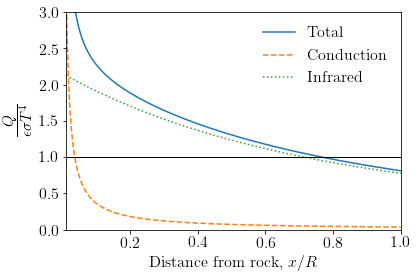

In [9]:
# Plot ratio of radiative heating (by rock) to emitted radiant flux of regolith
# When the ratio Q_IR/Q_rad ~ 1, radiative heating is no longer dominant
total_curve = plt.plot(x/R,(Q_ir+Q_cond)/Q_rad, label='Total')
conduction_curve = plt.plot(x/R, Q_cond/Q_rad, '--', label='Conduction')
ir_heating_curve = plt.plot(x/R, Q_ir/Q_rad, ':', label='Infrared')
plt.plot(x/R, x*0+1, '-k', linewidth=1.0)
font = {'family' : 'serif',
        'size'   : 16}
plt.xlabel('Distance from rock, $x/R$',fontsize=16)
plt.ylabel(r'$\frac{Q}{\epsilon\sigma T^4}$',fontsize=22)
plt.axis([.01,1,0.0,3])
matplotlib.rc('font', **font)
plt.legend(frameon=False, fontsize=16)
plt.savefig('figures/regolith_relative_heating_rates.pdf',bbox_inches='tight')
plt.show()

### 3-d Numerical Calculations

We also performed 3-D numerical calculations of temperatures in regolith surrounding rock. Below, the COMSOL results are compared to the analytical model described above. The COMSOL mesh (figure below) simulates a spherical rock embedded in regolith, such that a hemisphere protrudes upward. Thermophysical properties for the rock are consistent with *Bandfield et al.* (2011). The model domain is 10 m $\times$ 10 m $\times$ 1 m.


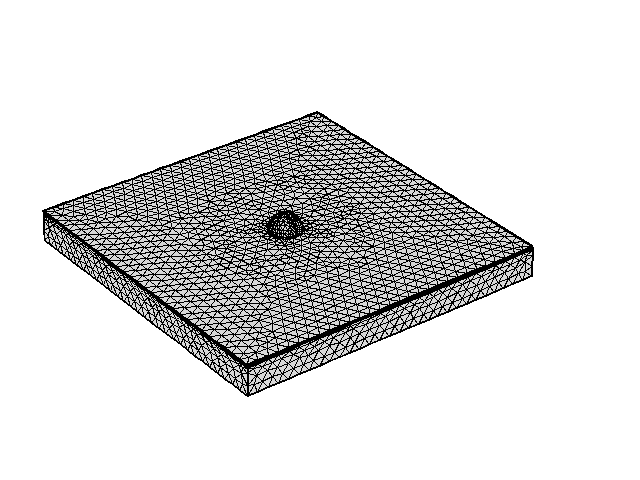

In [10]:
from IPython.display import Image
Image(filename='/Users/phayne/research/collaborators/WilliamsJP/rocks/Rock_sphere-01-mesh4.png')

In [11]:
# Load numerical data from COMSOL
import pandas as pd
comsol_data = pd.read_csv('data/Sphere_1m_diurnal_temps.csv')
tt = comsol_data['T (K) @ t=4.58E6'] # Should be close to midnight
y = np.arange(-0.05,0.01*(np.size(tt)-5),0.01) # first 5 nodes are inside rock

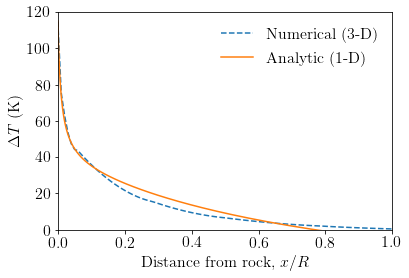

In [12]:
#############################################
# Compare Analytic to Numerical Calculation #
#############################################
fig = plt.figure()
matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)
deltaT_3d = plt.plot(y/R,tt-T_reg,'--',label='Numerical (3-D)')
deltaT_1d = plt.plot(x/R,deltaT,label='Analytic (1-D)')
plt.xlim([-.001,1])
plt.ylim([0,120])
plt.xlabel('Distance from rock, $x/R$')
plt.ylabel('$\Delta T$ (K)')
plt.legend(frameon=False,fontsize=16)
plt.savefig('figures/temperatureChange_due_to_rock.pdf',bbox_inches='tight')

### Typical spacing of rocks and extent of regolith warming

Given a rock abundance (i.e., area fraction) $C$ and rock diameter $D=2R$, the mean distance between rocks is

$$ d \sim \left(\frac{A_\mathrm{rock}}{C}\right)^\frac{1}{2} - D = \left(\frac{1}{\sqrt{C}} - 1\right)D $$

Typical rock concentrations on the Moon are $C \approx 0.4\%$ (*Bandfield et al.*, 2011). At a concentration of 0.4%, meter-sized rocks are typically spaced by $d \approx 30$ m. This means that the average distance to a rock on the lunar surface is $d/4 \sim 7.5$ m. The fractional area of regolith heated by radiation and conduction from rocks is $ (\delta A/A_\textrm{rock})C = [(x_\textrm{max}/R)^2 + 2x_\textrm{max}/R]C$, where $x_\textrm{max}$ is the maximum lateral extent of warming calculated above. (Note: $x_\textrm{max}$ must be $< d/2$, which is half the distance between rocks)

Defining $x' = x/R$, the total fractional area *not* affected by rocks is

$$ \alpha = 1 - C\left(1 + x_\mathrm{max}'\right)^2 $$

In [13]:
#######################
# Example calculation #
#######################
C = 0.40e-2 # Rock abundance
d = 2*R * (1/np.sqrt(C) - 1)  # Mean distance between rocks
A_heat = 2*np.float(xmax)*C/R # fractional area heated by conduction and radiation from rocks
A_no_heat = 1 - C*(1+xmax/R)**2

# Print results:
print('Rock abundance: {:.2f}%'.format(C*100))
print('Average distance between rocks: {:.1f} m'.format(d))
print('Regolith area warmed by rocks: {:.2f}%'.format(A_heat*100))
print('Area not affected by rocks: {:.2f}%'.format(A_no_heat*100))

Rock abundance: 0.40%
Average distance between rocks: 29.6 m
Regolith area warmed by rocks: 0.61%
Area not affected by rocks: 98.77%


### Effects of regolith-heating by rocks on measured radiance

In the simplified two-component rock/regolith model, the measured radiance, $I_\lambda$ (SI units: W m$^{-2}$ sr$^{-1}$ m$^{-1}$) at a specific wavelength $\lambda$ is given by

$$ I_\lambda = \epsilon_\lambda CB_\lambda(T_\mathrm{rock}) + \epsilon_\lambda(1-C)B_\lambda(T_\mathrm{reg}) $$

where $B_\lambda(T)$ is the Planck function, and $\epsilon_\lambda$ is the spectral emissivity of the surface. Heating by rocks increases thermal emission from the surrounding regolith, with each rock's "sphere of influence" extending a distance $x_\textrm{max}$. Measured brightness temperatures are therefore higher than would be predicted by the simpler two-component rock/regolith thermal model. Again at a specified wavelength $\lambda$, in this case the measured radiance is the sum of contributions from the rocks, the heated regolith region, and the un-heated regolith region:

\begin{align}
I_\lambda & = I_\mathrm{rock} + I_\mathrm{reg,heated} + I_\mathrm{reg} \\
          & = \epsilon_\lambda CB_\lambda(T_\mathrm{rock}) + \epsilon_\lambda \frac{C}{A_\mathrm{rock}}\int_0^{x_\mathrm{max}}B_\lambda(T_\mathrm{reg}+\Delta T)2\pi(R+x)dx + \epsilon_\lambda \alpha B_\lambda(T_\mathrm{reg})
\end{align}

where $A_\textrm{rock} \sim \pi R^2$ is the area of an individual rock, as viewed from above.

In [14]:
# Function definitions for thermal emission models

#######################
# Two-component Model #
#######################
def radiance_standard(T_rock, T_reg, C, lam, emis_lam):
    from planetRad import planck
    
    radiance = emis_lam*C*planck(T_rock, lam) + emis_lam*(1-C)*planck(T_reg, lam)
    return radiance

def brightness_temp_standard(T_rock, T_reg, C, lam, emis_lam):
    from planetRad import iplanck
    
    radiance = radiance_standard(T_rock, T_reg, C, lam, emis_lam)
    
    Tb = iplanck(radiance, lam)
    return Tb
#######################

###############################
# Rock-regolith heating model #
###############################
def radiance_rock_heating(T_rock, T_reg, R, C, x, xmax, lam, emis_lam):
    from planetRad import planck
    
    xp = x[x<xmax]/R # scaled dist. from rock edge to max. dist. of heating
    xmaxp = xmax/R # maximum distance of heating, scaled by rock size
    alpha = 1 - C*(1+xmaxp)**2 # regolith fraction not heated by rocks

    # Calculate radiance at each unique wavelength in lam:
    radiance = []
    for l in lam:
        radiance.append( emis_lam*C*planck(T_rock, l) \
                        + 2*C*emis_lam*np.trapz(planck(T_reg+deltaT[x<xmax], l)*(1+xp)/R, xp) \
                        + emis_lam*alpha*planck(T_reg, l) )
    return radiance

def brightness_temp_rock_heating(T_rock, T_reg, R, C, x, xmax, lam, emis_lam):
    from planetRad import iplanck
    
    radiance = radiance_rock_heating(T_rock, T_reg, R, C, x, xmax, lam, emis_lam)
    
    # Convert radiance to brightness temperature
    Tb = iplanck(radiance, lam)
    return Tb
###############################

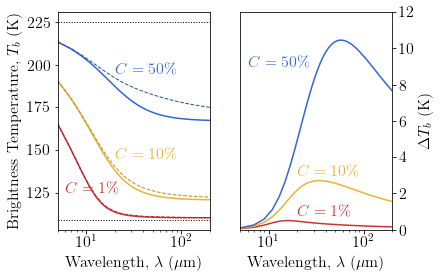

In [15]:
########################
# Run comparison cases #
########################

# Constant parmeters
lam = np.linspace(5,200,100)*1e-6 # Wavelength in METERS
lamum = lam*1e6 # Wavelength in microns
emis_lam = 1.0 # Spectral emissivity [To do: make it an array for lam-dependence]

# Brightness temp. including rock heating:
C = 0.01 # Rock abundance = 1%
Tb_nominal_1 = brightness_temp_standard(T_rock, T_reg, C, lam, emis_lam)
Tb_heating_1 = brightness_temp_rock_heating(T_rock, T_reg, R, C, x, xmax, lam, emis_lam)
C = 0.10 # Rock abundance = 10%
Tb_nominal_2 = brightness_temp_standard(T_rock, T_reg, C, lam, emis_lam)
Tb_heating_2 = brightness_temp_rock_heating(T_rock, T_reg, R, C, x, xmax, lam, emis_lam)
C = 0.50 # Rock abundance = 50%
Tb_nominal_3 = brightness_temp_standard(T_rock, T_reg, C, lam, emis_lam)
Tb_heating_3 = brightness_temp_rock_heating(T_rock, T_reg, R, C, x, xmax, lam, emis_lam)

# Comparison plots:
plt.subplot(121)

# Colors:
c1, c2, c3 = np.array([0.8,0.2,0.2]), np.array([0.9,0.7,0.2]), np.array([0.2,0.4,0.8])

# Plots:
plt.plot(lamum, Tb_nominal_1, color=c1)
plt.plot(lamum, Tb_heating_1, color=c1*0.8, linestyle='--', linewidth=1)
plt.plot(lamum, Tb_nominal_2, color=c2)
plt.plot(lamum, Tb_heating_2, color=c2*0.8, linestyle='--', linewidth=1)
plt.plot(lamum, Tb_nominal_3, color=c3)
plt.plot(lamum, Tb_heating_3, color=c3*0.8, linestyle='--', linewidth=1)
plt.semilogx(lamum, lamum*0 + T_rock, ':k', linewidth=1)
plt.semilogx(lamum, lamum*0 + T_reg, ':k', linewidth=1)
plt.xlim([np.min(lamum),np.max(lamum)])
plt.xlabel('Wavelength, $\lambda$ ($\mu$m)')
plt.ylabel('Brightness Temperature, $T_b$ (K)')
plt.text(6, 125, r'$C = 1\%$', color=c1)
plt.text(20, 145, r'$C = 10\%$', color=c2)
plt.text(20, 195, r'$C = 50\%$', color=c3)

ax2 = plt.subplot(122)
plt.semilogx(lamum, Tb_heating_1-Tb_nominal_1, color=c1)
plt.semilogx(lamum, Tb_heating_2-Tb_nominal_2, color=c2)
plt.semilogx(lamum, Tb_heating_3-Tb_nominal_3, color=c3)
plt.xlabel('Wavelength, $\lambda$ ($\mu$m)')
plt.ylabel('$\Delta T_b$ (K)')
plt.xlim([np.min(lamum),np.max(lamum)])
plt.ylim([0,12])
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
plt.text(20, 0.75, r'$C = 1\%$', color=c1)
plt.text(20, 3, r'$C = 10\%$', color=c2)
plt.text(6, 9, r'$C = 50\%$', color=c3)
plt.savefig('figures/effects_of_rock-regolith-heating_on_tb.pdf',bbox_inches='tight')

**Figure (above):** (LEFT PANEL) Modeled brightness temperatures for three different values of the rock abundance, $C$, using the standard two-component model (solid curves) and a model accounting for heating of the regolith by rocks (dashed curves). (RIGHT PANEL) Difference, $\Delta T_b$ in brightness temperature of the regolith-heating model, relative to the two-component "standard" model. In all cases, rocks are assumed to have constant radius $R$.

### Diviner measurements and effects of regolith heating on rock abundance determination

Diviner measures radiance across finite spectral bands, with response functions $f_j(\lambda)$ for each channel, $j$. Regolith heating by rocks affects each channel differently, with measured radiance

$$ I_j = \int_0^\infty f_j(\lambda)I_\lambda d\lambda $$

Response functions for the key Diviner channels used in deriving rock abundance are shown below. Their "effective wavelengths", $\tilde{\lambda}_j$, for a homogeneous scene temperature $T$ can be calculated from

$$ \tilde{\lambda}_j(T) = \frac{\int_0^\infty \lambda f_j(\lambda)B_\lambda(T) d\lambda}{\int_0^\infty f_j(\lambda)B_\lambda(T) d\lambda} $$

This is a useful concept in estimating an approximate wavelength for each channel, but is not accurate for a scene with multiple temperatures (e.g., regolith and rocks).

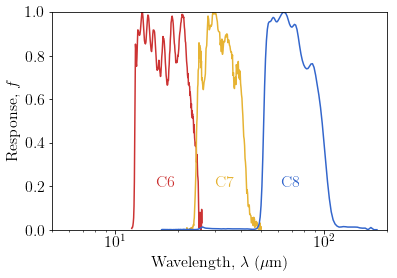

In [27]:
# Diviner response functions:
f6 = np.genfromtxt('data/div_response_c6.txt')
f7 = np.genfromtxt('data/div_response_c7.txt')
f8 = np.genfromtxt('data/div_response_c8.txt')

#Effective wavelengths
C = 0.1
T = C*T_rock + (1-C)*T_reg # Some weighted average temperature
lam_eff_6 = pr.effective_wavelength(f6[:,1], f6[:,0], T)
lam_eff_7 = pr.effective_wavelength(f7[:,1], f7[:,0], T)
lam_eff_8 = pr.effective_wavelength(f8[:,1], f8[:,0], T)

plt.semilogx(f6[:,0],f6[:,1], color=c1)
plt.semilogx(f7[:,0],f7[:,1], color=c2)
plt.semilogx(f8[:,0],f8[:,1], color=c3)
plt.text(lam_eff_6, 0.2, 'C6', color=c1)
plt.text(lam_eff_7, 0.2, 'C7', color=c2)
plt.text(lam_eff_8, 0.2, 'C8', color=c3)
plt.ylim([0,1])
plt.xlim([np.min(lamum),np.max(lamum)])
plt.xlabel('Wavelength, $\lambda$ ($\mu$m)')
plt.ylabel('Response, $f$')
plt.show()

In [57]:
# Calculate Diviner radiance using both models,
# over a range of rock abundance values
CArr = np.linspace(0,1,100)

# Diviner radiance
rad_s_6, rad_h_6 = [], [] # initialize channel 6
rad_s_7, rad_h_7 = [], [] # initialize channel 7
rad_s_8, rad_h_8 = [], [] # initialize channel 8
for C in CArr:
    
    #############
    # CHANNEL 6 #
    #############
    # Spectral radiance for two models
    lam_div = f6[:,0]*1e-6 # Diviner wavelength array [m]
    specrad_s = radiance_standard(T_rock, T_reg, C, lam_div, emis_lam)
    specrad_h = radiance_rock_heating(T_rock, T_reg, R, C, x, xmax, lam_div, emis_lam)
    # Integrate spectral radiance over this channel's bandpass
    rad_s_6.append( np.trapz(f6[:,1]*specrad_s, lam_div) )
    rad_h_6.append( np.trapz(f6[:,1]*specrad_h, lam_div) )
    
    #############
    # CHANNEL 7 #
    #############
    # Spectral radiance for two models
    lam_div = f7[:,0]*1e-6 # Diviner wavelength array [m]
    specrad_s = radiance_standard(T_rock, T_reg, C, lam_div, emis_lam)
    specrad_h = radiance_rock_heating(T_rock, T_reg, R, C, x, xmax, lam_div, emis_lam)
    # Integrate spectral radiance over this channel's bandpass
    rad_s_7.append( np.trapz(f7[:,1]*specrad_s, lam_div) )
    rad_h_7.append( np.trapz(f7[:,1]*specrad_h, lam_div) )
    
    #############
    # CHANNEL 8 #
    #############
    # Spectral radiance for two models
    lam_div = f8[:,0]*1e-6 # Diviner wavelength array [m]
    specrad_s = radiance_standard(T_rock, T_reg, C, lam_div, emis_lam)
    specrad_h = radiance_rock_heating(T_rock, T_reg, R, C, x, xmax, lam_div, emis_lam)
    # Integrate spectral radiance over this channel's bandpass
    rad_s_8.append( np.trapz(f8[:,1]*specrad_s, lam_div) )
    rad_h_8.append( np.trapz(f8[:,1]*specrad_h, lam_div) )

# Convert lists to numeric arrays
rad_s_6, rad_h_6 = np.array(rad_s_6), np.array(rad_h_6)
rad_s_7, rad_h_7 = np.array(rad_s_7), np.array(rad_h_7)
rad_s_8, rad_h_8 = np.array(rad_s_8), np.array(rad_h_8)

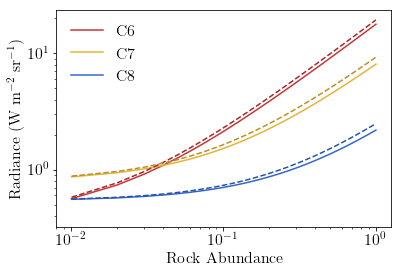

In [62]:
# Plot results
plt.loglog(CArr, rad_s_6, color=c1, label='C6')
plt.loglog(CArr, rad_s_7, color=c2, label='C7')
plt.loglog(CArr, rad_s_8, color=c3, label='C8')
plt.loglog(CArr, rad_h_6, color=c1*0.8, linestyle='--')
plt.loglog(CArr, rad_h_7, color=c2*0.8, linestyle='--')
plt.loglog(CArr, rad_h_8, color=c3*0.8, linestyle='--')
plt.xlabel('Rock Abundance')
plt.ylabel('Radiance (W m$^{-2}$ sr$^{-1}$)')
plt.legend(frameon=False, fontsize=16)